In [2]:
!cd ..
!cd /root/.config/kaggle/

from google.colab import files
uploaded = files.upload()

!cp kaggle.json /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 945MB/s]


In [4]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.dtypes

,0
label,int64
pixel0,int64
pixel1,int64
pixel2,int64
pixel3,int64
...,...
pixel779,int64
pixel780,int64
pixel781,int64
pixel782,int64


In [10]:
test.dtypes

,0
pixel0,int64
pixel1,int64
pixel2,int64
pixel3,int64
pixel4,int64
...,...
pixel779,int64
pixel780,int64
pixel781,int64
pixel782,int64


In [11]:
train.shape

(42000, 785)

In [12]:
test.shape

(28000, 784)

In [13]:
print('Missing values in training data : ' + str(train.isnull().values.sum()))
print('Missing values in testing data : ' + str(test.isnull().values.sum()))

Missing values in training data : 0
Missing values in testing data : 0


In [14]:
X = train.drop('label', axis=1)
y = train['label']

In [15]:
X = X / 255.0
test = test / 255.0

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# ***Logistic Regression***

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
# Initialize and train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Predict and evaluate
y_pred_lr = lr_model.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))

Logistic Regression Accuracy: 0.9142857142857143


In [20]:
y_pred_test = lr_model.predict(test)

In [21]:
submission = pd.DataFrame({
    "ImageId": list(range(1, len(y_pred_test)+1)),
    "Label": y_pred_test
})
submission.to_csv("submission.csv", index=False)

# ***Convolution Neural Networks (CNN)***

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Reshape data for CNN: (samples, height, width, channels)
X_train_cnn = X_train.values.reshape(-1, 28, 28, 1)
X_val_cnn = X_val.values.reshape(-1, 28, 28, 1)
X_test_cnn = test.values.reshape(-1, 28, 28, 1)


# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)

# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN
cnn_model.fit(X_train_cnn, y_train_cat, epochs=10, validation_data=(X_val_cnn, y_val_cat))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.8321 - loss: 0.5273 - val_accuracy: 0.9762 - val_loss: 0.0765
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.9690 - loss: 0.1001 - val_accuracy: 0.9848 - val_loss: 0.0478
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9782 - loss: 0.0719 - val_accuracy: 0.9886 - val_loss: 0.0360
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9841 - loss: 0.0562 - val_accuracy: 0.9895 - val_loss: 0.0347
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 38s 32ms/step - accuracy: 0.9865 - loss: 0.0439 - val_accuracy: 0.9895 - val_loss: 0.0325
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - accuracy: 0.9875 - loss: 0.0398 - val_accuracy: 0.9888 - val_loss: 0.0338
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 68s 32ms/step - accuracy: 0.9895 - loss: 0.0314 - val_accuracy: 0.9912 - val_loss: 0.0340
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9916 -

In [23]:
# Evaluate model on training data
train_loss, train_accuracy = cnn_model.evaluate(X_train_cnn, y_train_cat, verbose=0)

# Print training accuracy
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 99.82%


In [28]:
# Predict on test data
pred_cnn = cnn_model.predict(X_test_cnn)
final_preds_cnn = pred_cnn.argmax(axis=1)

# Prepare submission
submission_cnn = pd.DataFrame({
    'ImageId': list(range(1, len(final_preds_cnn)+1)),
    'Label': final_preds_cnn
})
submission_cnn.to_csv('cnn_submission.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step


# ***SVM Model***

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Flatten input for SVM
X_train_svm = X_train.values.reshape(len(X_train), -1)
X_val_svm = X_val.values.reshape(len(X_val), -1)
X_test_svm = test.values.reshape(len(test), -1)

# Train SVM
svm_model = SVC()
svm_model.fit(X_train_svm, y_train)

# Evaluate
y_pred_val = svm_model.predict(X_val_svm)
print("SVM Accuracy:", accuracy_score(y_val, y_pred_val))

# Predict and save
pred_svm = svm_model.predict(X_test_svm)
submission_svm = pd.DataFrame({
    'ImageId': list(range(1, len(pred_svm)+1)),
    'Label': pred_svm
})
submission_svm.to_csv('svm_submission.csv', index=False)


SVM Accuracy: 0.9759523809523809


# ***Artificial Neural Network (ANN)***

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Flatten for ANN
X_train_ann = X_train.values.reshape(len(X_train), -1)
X_val_ann = X_val.values.reshape(len(X_val), -1)
X_test_ann = test.values.reshape(len(test), -1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)

# Build ANN
ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
ann_model.fit(X_train_ann, y_train_cat, epochs=10, validation_data=(X_val_ann, y_val_cat))

# Predict and save
pred_ann = ann_model.predict(X_test_ann)
final_preds_ann = pred_ann.argmax(axis=1)

submission_ann = pd.DataFrame({
    'ImageId': list(range(1, len(final_preds_ann)+1)),
    'Label': final_preds_ann
})
submission_ann.to_csv('ann_submission.csv', index=False)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8491 - loss: 0.4842 - val_accuracy: 0.9495 - val_loss: 0.1451
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9579 - loss: 0.1358 - val_accuracy: 0.9636 - val_loss: 0.1174
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9656 - loss: 0.1134 - val_accuracy: 0.9698 - val_loss: 0.0984
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9723 - loss: 0.0888 - val_accuracy: 0.9729 - val_loss: 0.0905
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9778 - loss: 0.0732 - val_accuracy: 0.9712 - val_loss: 0.0891
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9789 - loss: 0.0644 - val_accuracy: 0.9745 - val_loss: 0.0851
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9826 - loss: 0.0542 - val_accuracy: 0.9748 - val_loss: 0.0909
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9812 -

In [26]:

# Evaluate on training set
train_loss, train_accuracy = ann_model.evaluate(X_train_ann, y_train_cat, verbose=0)
print(f"Training Accuracy (ANN): {train_accuracy * 100:.2f}%")

# Evaluate on validation set
val_loss, val_accuracy = ann_model.evaluate(X_val_ann, y_val_cat, verbose=0)
print(f"Validation Accuracy (ANN): {val_accuracy * 100:.2f}%")

Training Accuracy (ANN): 99.39%
Validation Accuracy (ANN): 97.74%


# ***KNN***

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Flatten input
X_train_knn = X_train.values.reshape(len(X_train), -1)
X_val_knn = X_val.values.reshape(len(X_val), -1)
X_test_knn = test.values.reshape(len(test), -1)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_knn, y_train)

# Evaluate
y_pred_val_knn = knn_model.predict(X_val_knn)
print("KNN Accuracy:", accuracy_score(y_val, y_pred_val_knn))

# Predict and save
pred_knn = knn_model.predict(X_test_knn)
submission_knn = pd.DataFrame({
    'ImageId': list(range(1, len(pred_knn)+1)),
    'Label': pred_knn
})
submission_knn.to_csv('knn_submission.csv', index=False)


KNN Accuracy: 0.9676190476190476


# ***Final Submissions Results***

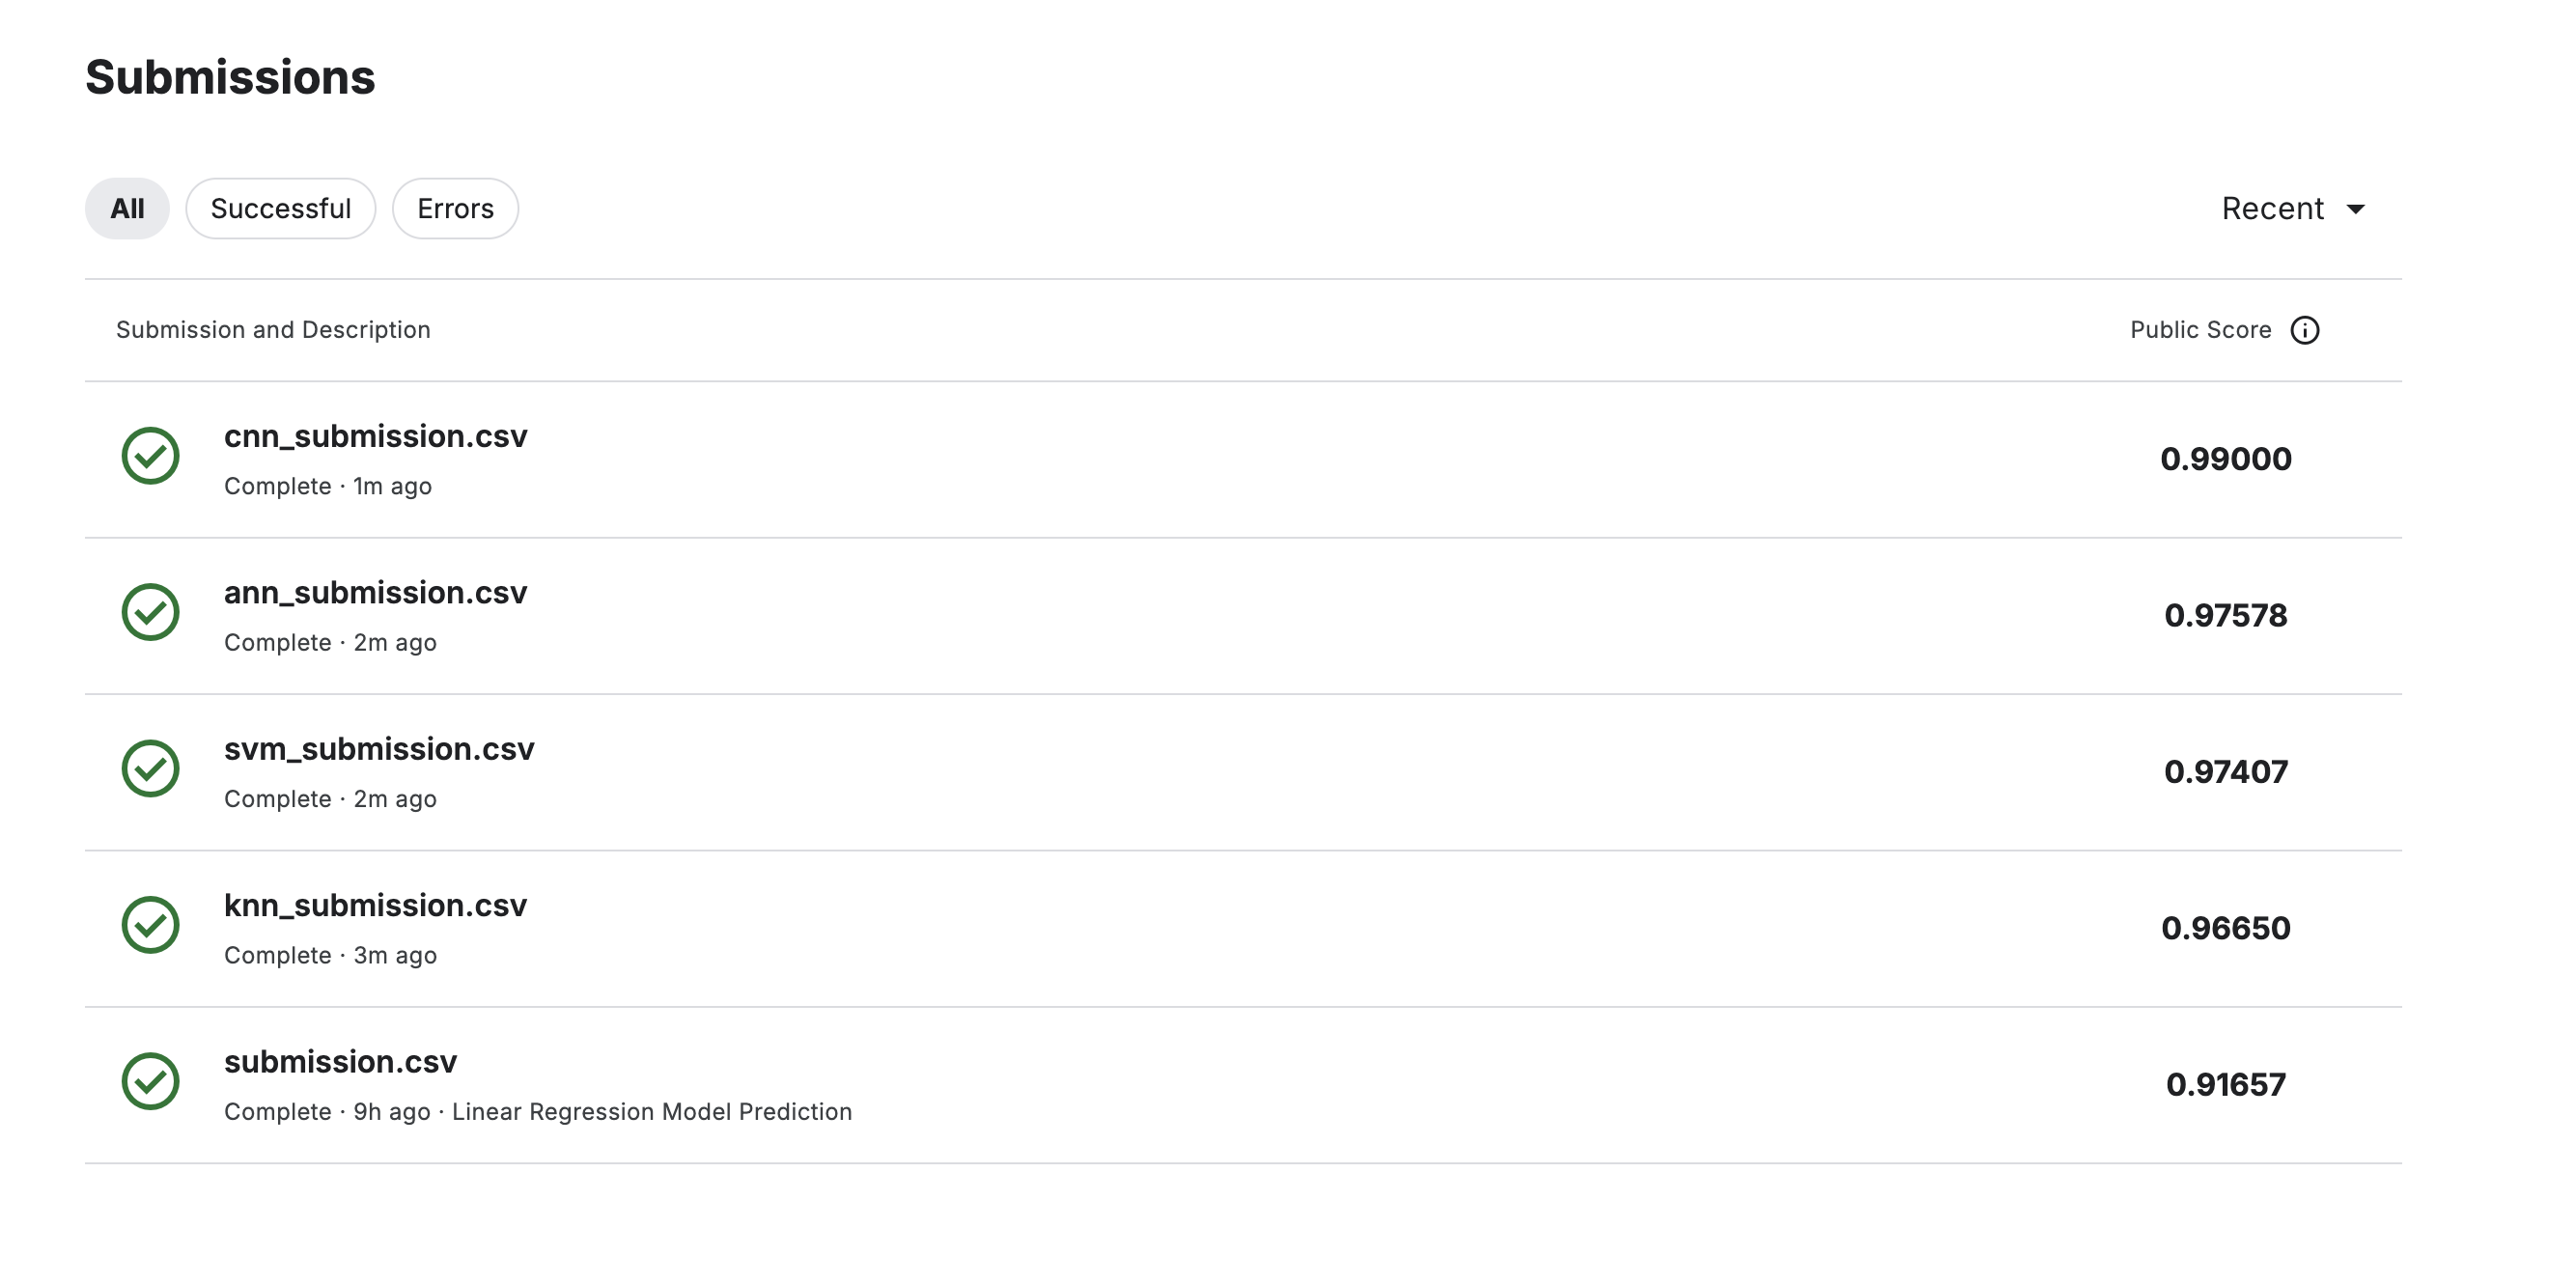

***Clearly Convolution neural networks performed the best for the Digit recognizer Dataset !!!***